# Optimization

MLE and MAP give us a framework for making decisions based on collected data. The problems we have seen so far have been rather simple, namely just focused around flipping coins. However, as you can probably imagine, we usually apply the same techniques to much more complicated problems. We'll graduate to such problems in later sections, but here we'll stick to the basics and develop techniques for addressing *optimization problems*, or simply problems that involve finding the optimal value of a variable according to an objective function, while abiding by a set of constraints. Be careful, as there's a slight abuse of notation in this section in regards to previous sections to stay consistent with optimization literature.

## Optimization Problems
In general, the standard of an optimization problem is as follows:

$$\begin{aligned}
\min_{x} \quad & f(x) \\
\textrm{s.t.} \quad & g_i(x) \leq 0, h_j(x) = 0
\end{aligned}$$

Here, $g_i$ and $h_j$ represent the $i$th and $j$th inequality and equality constraint respectively.

MLE and MAP are special cases of this optimization form, where the objective function $f$ is based on some probability measure and there may or may not be constraints. Note that maximization problems can easily be turned into minimization problems by multiplying the objective function by $-1$. We'll work with the following example for the rest of this section (it may seem familiar).

```{admonition} Example: Bias Estimation of a coin
Let's say that you have a mystery coin that is fair or biased but you don't know which. You flip the coin twice and it lands on heads once and lands on tails once. Using MLE, estimate the bias of the coin.
```

As we did in the last section, let's denote the bias of our coin as $y$. We can solve for the MLE objective is as follows.
\begin{equation}
\max_y P(X = x | Y = y) = \max_y y(1-y)
\end{equation}
Note that we have the additional constraint that our bias $y$, must be a value between 0 and 1 as it represents a probability. Thus, our full optimization in problem in standard form is:

$$\begin{aligned}
\min_{y} \quad & -y(1-y) \\
\textrm{s.t.} \quad & -y \leq 0,  y \leq 1
\end{aligned}$$
Below is a visualization of the orginal MLE objective and the transformed objective. Note that the constraints on $y$ are depicted in red.


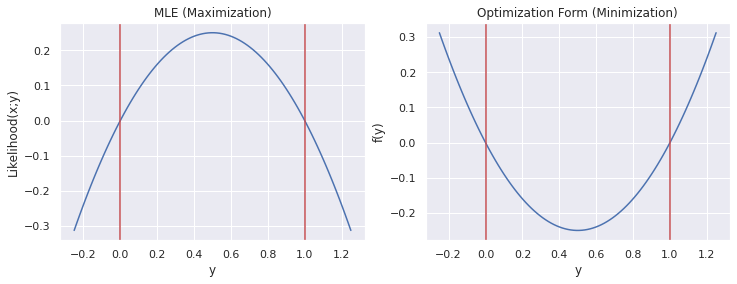

In [31]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

fig, ax = plt.subplots(1,2, figsize=(12,4))

x = np.linspace(-0.25, 1.25, 100)
y = x*(1-x)
g_mle = sns.lineplot(x=x, y=y, ax=ax[0])
g_mle.axvline(x=0, color='r')
g_mle.axvline(x=1.0, color='r')
g_mle.set_title("MLE (Maximization)")
g_mle.set_xlabel("y")
g_mle.set_ylabel("Likelihood(x;y)")
g_opt = sns.lineplot(x=x, y=-y, ax=ax[1])
g_opt.axvline(x=0, color='r')
g_opt.axvline(x=1.0, color='r')
g_opt.set_xlabel("y")
g_opt.set_ylabel("f(y)")
_ = g_opt.set_title("Optimization Form (Minimization)")

Notice how the optimal value, $y^*$ is the same, $0.5$ for both graphs as they are equivalent formulations of the same problem. This is a relatively simple one dimensional problem, so we can easily see that the optimal choice of $y$ for the bias of the coin would be 0.5. However, in machine learning we are often faced with much more difficult problems. This seciton will provide some techniques we'll use to solve more complicated optimization problems. For the rest of this section, we'll use the standard optimization form rather than the MLE maximization form.

## Solving Algebraically
If you've taken calculus (which I'm going to assume you have), you should be familiar with how to find the maxima and minima of a function. That's exactly what were trying to do here. Simply put, to find the minimum value of a cost function $f$, we take the derivative of with respect to each of its input parameters, which we have been denoting generally as $x$, set it it equal to zero, and solve. However, we also need to consider the constraints, and thus need to check all values where the constraints are tight. We can formulate this mathematically as follows. 

First, we define $\mathcal{X}$ as the feasible set, or all values of $x$ possible such that the constraints are satisifed.

$$\mathcal{X} := \left\{ x |  g_i(x) \leq 0 \forall i, h_j(x) = 0 \forall j \right\}$$

Our candidates for optimal points are the critical points of $f$ that are within the feasible set $\mathcal{X}$, and the points on the boundary of the feasible set. The optimal value $x^*$ is then minima of all the candidate points.

Let's do this algebraically for our example. 

First we check the boundary conditions, namely $y =0$ and $y=1$. This yields $f(0) = f(1) = 0$ by simply plugging values into the objective function $f(y) = -y(1-y)$. Now, we can check the critical points by taking the derivative.
\begin{equation}
\frac{\partial f}{\partial y} = -(1-y) + (-y)(-1) = 0 \implies y = 0.5
\end{equation}
We can check the constraints to see this is indeed a valid solution. $f(0.5) = -0.25$, which is smaller than the border points, and thus $y^* = 0.5$ is the optimal point. 

## Unconstrained Problems
The example we have been dealing with so far has been a constrained problem, as we had to ensure that the final value remained between 0 and 1 to be a valid probability. Though it ended up that the critical point was the best solution, this is not always the case. Luckily, the problems we usually deal with in machine learning are *unconstrained*, meaning they have no constraints $g_i$ or $h_j$. This in fact makes them much easier to solve as we no longer need to check border points and thus we can disregard a lot of extra tedious work. Unconstrainted problems also work much better with numerical optimizers, and when you can't remove constraints from a problem, there are several techniques (which we won't go into) that transform constrained problems into unconstrained ones.

## Graident Descent
Though our example could easily be solved by just finding numerical points algebraically, for most large scale problems finding an algebraic solution will be impossible. Thus, mathematicians and engineers have developed many techniques for solving these optimization problems numerically. The most famous, and also perhaps simplest, optimization technique is called *gradient descent*. Gradient descent can be summarized by one principle: move in the direction of greatest descent, or in the direction where the function is decreasing the most. We can find the direction of steepest descent by simply taking the gradient of the function (gradient = multi-dimensional derivative). Once we find the direction of steepest descent, we take a small step in that direction. Let's see this visually using our example. We'll ignore the constraints for the remainder of this section.

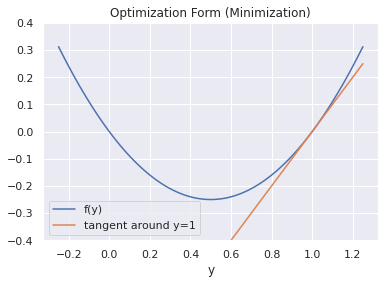

In [41]:
g_opt = sns.lineplot(x=x, y=-y, label="f(y)")
g_lin = sns.lineplot(x=x, y=x-1, label="tangent around y=1")
plt.ylim(-0.4, 0.4)
g_opt.set_xlabel("y")
_ = g_opt.set_title("Optimization Form (Minimization)")

The above plot shows the line tangent to the objective function $f$ at the point $y=1.0$. The slope of the tangent line (also the first order approximation), is equal to the derivative of the objective function at that point. Intuitively, we can see that the slope is positive, indicating that the derivative is also positive. The derivative gives the infinitesimal change in the objective function for a small increase in $y$. Thus, a positive derivative means that the objective function is increasing, while a negative derivative means the objective function is decreasing. The direction (in parameter space) of steepest descent is subsequently given by the direction *opposite* the gradient. In the example above, the derivative is positive, so we would move in the negative direction, towards the minimum. The gradient descent algorithm is summarized below:

1. $x \leftarrow$ a random starting guess
2. For $N$ steps, $x \leftarrow x - \alpha \nabla_x f(x)$

$\alpha$ is a chosen value that determines how much we step each iteration. Note that $\nabla_x f$ is referred to as the *gradient* and is just a vector that contains all the partial derivatives of $f$ with respect to each component of the parameters $x$. 

Here's a visualization of gradient descent in a two-dimensional problem.

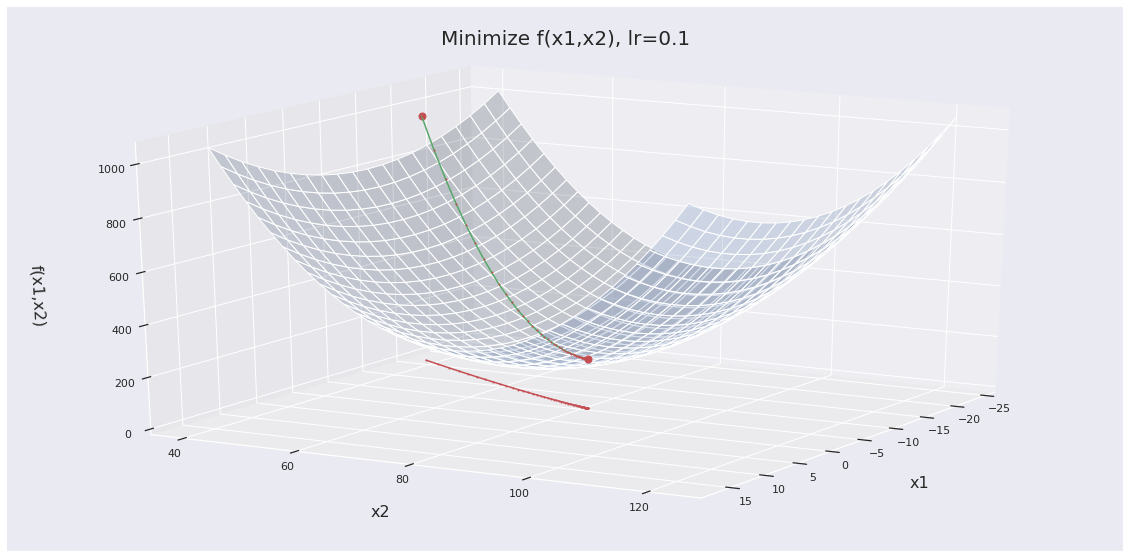

In [62]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy import stats 

from sklearn.datasets.samples_generator import make_regression 



x, y = make_regression(n_samples = 100, 
                       n_features=1, 
                       n_informative=1, 
                       noise=20,
                       random_state=2017)
x = x.flatten()


def gradient_descent(x, y, theta_init, step=0.001, maxsteps=100, precision=0.001, ):
    costs = []
    m = y.size # number of data points
    theta = theta_init
    history = [] # to store all thetas
    preds = []
    counter = 0
    oldcost = 0
    pred = np.dot(x, theta)
    error = pred - y 
    currentcost = np.sum(error ** 2) / (2 * m)
    preds.append(pred)
    costs.append(currentcost)
    history.append(theta)
    counter+=1
    while abs(currentcost - oldcost) > precision:
        oldcost=currentcost
        gradient = x.T.dot(error)/m 
        theta = theta - step * gradient  # update
        history.append(theta)
        
        pred = np.dot(x, theta)
        error = pred - y 
        currentcost = np.sum(error ** 2) / (2 * m)
        costs.append(currentcost)
        
        if counter % 25 == 0: preds.append(pred)
        counter+=1
        if maxsteps:
            if counter == maxsteps:
                break
        
    return history, costs, preds, counter
xaug = np.c_[np.ones(x.shape[0]), x]
theta_i = [-15, 40] + np.random.rand(2)
history, cost, preds, iters = gradient_descent(xaug, y, theta_i, step=0.1)
theta = history[-1]

from mpl_toolkits.mplot3d import Axes3D

def error(X, Y, THETA):
    return np.sum((X.dot(THETA) - Y)**2)/(2*Y.size)

ms = np.linspace(theta[0] - 20 , theta[0] + 20, 20)
bs = np.linspace(theta[1] - 40 , theta[1] + 40, 40)

M, B = np.meshgrid(ms, bs)

zs = np.array([error(xaug, y, theta) 
               for theta in zip(np.ravel(M), np.ravel(B))])
Z = zs.reshape(M.shape)

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(M, B, Z, rstride=1, cstride=1, color='b', alpha=0.2)
#ax.contour(M, B, Z, 20, color='b', alpha=0.5, offset=0, stride=30)

ax.set_xlabel('x1', labelpad=30, fontsize=16)
ax.set_ylabel('x2', labelpad=30, fontsize=16)
ax.set_zlabel('f(x1,x2)', labelpad=30, fontsize=16)
ax.view_init(elev=20., azim=30)
ax.plot([theta[0]], [theta[1]], [cost[-1]] , markerfacecolor='r', markeredgecolor='r', marker='o', markersize=7)
ax.plot([history[0][0]], [history[0][1]], [cost[0]] , markerfacecolor='r', markeredgecolor='r', marker='o', markersize=7)


ax.plot([t[0] for t in history], [t[1] for t in history], cost , markerfacecolor='r', markeredgecolor='r', marker='.', markersize=2)
ax.plot([t[0] for t in history], [t[1] for t in history], 0 , markerfacecolor='r', markeredgecolor='r', marker='.', markersize=2)

_ = plt.title("Minimize f(x1,x2), lr=0.1", fontsize=20)

In the above example, we can see how gradient descent finds the minima of this quadratic cost function rather easily. The gradient of the function at different points can sort of be seen along the descent path (green line). You can also image there being planes tangent to the surface that give the gradient at different points. Though for these toy examples gradient descent works very well, there are a few problems we need to be aware of in practice.

### Choosing a Good Learning Rate
The outcome of gradient descent can be completely determined by your choice of learning rate. Let's run the same multi-dimensional optimization as before, but change up the learning rate. In the original example, we used a learning rate of 0.1 and ran the optimization for 100 steps. Now let's set a lower learning rate of 0.01.

In [76]:
history, cost, preds, iters = gradient_descent(xaug, y, theta_i, step=0.01)
theta = history[-1]

from mpl_toolkits.mplot3d import Axes3D

def error(X, Y, THETA):
    return np.sum((X.dot(THETA) - Y)**2)/(2*Y.size)

ms = np.linspace(theta[0] - 20 , theta[0] + 20, 20)
bs = np.linspace(theta[1] - 40 , theta[1] + 40, 40)

M, B = np.meshgrid(ms, bs)

zs = np.array([error(xaug, y, theta) 
               for theta in zip(np.ravel(M), np.ravel(B))])
Z = zs.reshape(M.shape)

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(M, B, Z, rstride=1, cstride=1, color='b', alpha=0.2)
#ax.contour(M, B, Z, 20, color='b', alpha=0.5, offset=0, stride=30)

ax.set_xlabel('x1', labelpad=30, fontsize=16)
ax.set_ylabel('x2', labelpad=30, fontsize=16)
ax.set_zlabel('f(x1,x2)', labelpad=30, fontsize=16)
ax.view_init(elev=20., azim=30)
ax.plot([theta[0]], [theta[1]], [cost[-1]] , markerfacecolor='r', markeredgecolor='r', marker='o', markersize=7)
ax.plot([history[0][0]], [history[0][1]], [cost[0]] , markerfacecolor='r', markeredgecolor='r', marker='o', markersize=7)


ax.plot([t[0] for t in history], [t[1] for t in history], cost , markerfacecolor='r', markeredgecolor='r', marker='.', markersize=2)
ax.plot([t[0] for t in history], [t[1] for t in history], 0 , markerfacecolor='r', markeredgecolor='r', marker='.', markersize=2)

_ = plt.title("Minimize f(x1,x2), lr=0.01", fontsize=20)

Clearly, we don't get close enough to the objective within 100 steps. With a learning rate set too low, convergence takes too long. 

Learning rates that are too large are also problematic. Let's set the learning rate to 2.

In [77]:
history, cost, preds, iters = gradient_descent(xaug, y, theta_i, step=2.0)
theta = history[-1]

from mpl_toolkits.mplot3d import Axes3D

def error(X, Y, THETA):
    return np.sum((X.dot(THETA) - Y)**2)/(2*Y.size)

ms = np.linspace(theta[0] - 20 , theta[0] + 20, 20)
bs = np.linspace(theta[1] - 40 , theta[1] + 40, 40)

M, B = np.meshgrid(ms, bs)

zs = np.array([error(xaug, y, theta) 
               for theta in zip(np.ravel(M), np.ravel(B))])
Z = zs.reshape(M.shape)

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(M, B, Z, rstride=1, cstride=1, color='b', alpha=0.2)
#ax.contour(M, B, Z, 20, color='b', alpha=0.5, offset=0, stride=30)

ax.set_xlabel('x1', labelpad=30, fontsize=16)
ax.set_ylabel('x2', labelpad=30, fontsize=16)
ax.set_zlabel('f(x1,x2)', labelpad=30, fontsize=16)
ax.view_init(elev=20., azim=30)
ax.plot([theta[0]], [theta[1]], [cost[-1]] , markerfacecolor='r', markeredgecolor='r', marker='o', markersize=7)
ax.plot([history[0][0]], [history[0][1]], [cost[0]] , markerfacecolor='r', markeredgecolor='r', marker='o', markersize=7)


ax.plot([t[0] for t in history], [t[1] for t in history], cost , markerfacecolor='r', markeredgecolor='r', marker='.', markersize=2)
ax.plot([t[0] for t in history], [t[1] for t in history], 0 , markerfacecolor='r', markeredgecolor='r', marker='.', markersize=2)

_ = plt.title("Minimize f(x1,x2), lr=2.0", fontsize=20)

Here, our learning rate is too large so we *overshoot* the objective, meaning we keep skipping over it during optimization. This causes gradient descent to never converge to a good optima.

### Local Minima
It's worth noting that gradient descent is *only* garunteed to converge to the optimal solution within $\epsilon > 0$ for convex objective functions with sufficiently small learning rates $\alpha$ and an infininte number of steps. Because gradient descent is a greedy-like algorithm, blindly moving in the direction of steepest descent at each iteration without considering global structure, it isn't garunteed to converge to the actual minima. However, it usually finds a solution that is *locally* optimal, meaning smaller than other points around it. Despite this flaw, gradient descent still works well on large scale problems like neural net training, where it's been shown that local minima are often very close to the global optima due to the high dimensionality of the search space.


Armed with a probablistic framework and an optimization technique, we can now begin to tackle real machine learning problems.



**Sources:**
1. [Plotting code for gradient descent](https://gist.github.com/felipessalvatore/c2e1c09dfcb8710b847e2457620f8204)